In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fractions
import pandas as pd

In [48]:
csv = pd.read_csv('../output/210129-E10-128-2.csv')

In [49]:
csv

,generation #,# alive cells,# dead cells,BORN,KILLED,avg x pos,avg y pos
0,10000,8075,8309,0,0,0,0
1,10001,4660,11724,1862,5277,63,63
2,10002,4650,11734,213,223,63,63
3,10003,4642,11742,200,208,63,63
4,10004,4631,11753,196,207,63,63
...,...,...,...,...,...,...,...
45013,94997,706,15678,151,166,71,54
45014,94998,726,15658,160,140,71,54
45015,94999,735,15649,178,169,71,54
45016,95000,728,15656,158,165,71,55


In [50]:
step = 10000
activity_dict = dict()
for gen in range(1,10):
    current = csv[(csv['generation #'] < (gen * step + step) ) & (csv['generation #'] >= gen * step)]
    activity_dict[gen] = np.array(current[' BORN']) + np.array(current[' KILLED'])


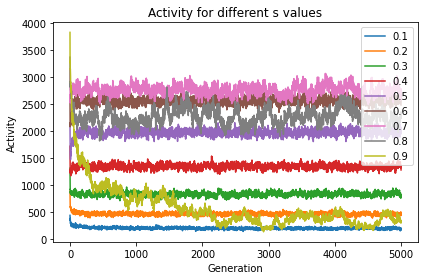

In [51]:
for key, val in activity_dict.items():
    plt.plot(val[2:], label=f'{(key/10):.2g}')
plt.legend()
plt.title('Activity for different s values')
plt.xlabel('Generation')
plt.ylabel('Activity')
plt.tight_layout()
plt.savefig('C:/Users/Oskar/Desktop/computingLab/RES/s-graph123123')

In [56]:
activity_dict

{1: array([   0, 7139,  436, ...,  164,  188,  174], dtype=int64),
 2: array([ 174, 7250,  888, ...,  472,  480,  474], dtype=int64),
 3: array([ 474, 7357, 1310, ...,  812,  812,  774], dtype=int64),
 4: array([ 774, 7144, 1717, ..., 1319, 1361, 1277], dtype=int64),
 5: array([1277, 7425, 2105, ..., 1966, 1958, 1957], dtype=int64),
 6: array([1957, 7232, 2579, ..., 2662, 2585, 2479], dtype=int64),
 7: array([2479, 7276, 3152, ..., 2734, 2781, 2691], dtype=int64),
 8: array([2691, 7333, 3366, ..., 2352, 2245, 2234], dtype=int64),
 9: array([2234, 7387, 3825, ...,  347,  323,  300], dtype=int64)}

In [54]:
from scipy import fftpack

In [70]:
X = fftpack.fft(activity_dict[8][1000:])
freqs = fftpack.fftfreq(len(activity_dict[8])-1000)

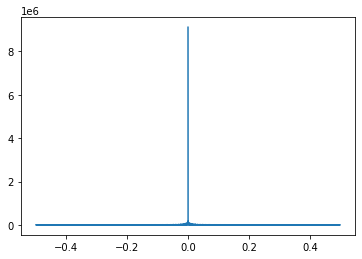

In [72]:
plt.plot(freqs, np.abs(X))